In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
test_df = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
print("columns in ",train_df.columns)

columns in  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [3]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

## dataset
* here we use train_df for taining our model and after training we test our model on test_df
* in train_df have one target feature which is "price_range" on which we make our model
* in test_df we have id variable which is just reference for something idk... 

In [5]:
# here lets start basic dive in dataset
df = train_df.copy()
print("shape of training model ",df.shape)
print(" infromation of dataset \n",df.info())
print("\n\ncount for numerical column :- \n",df.dtypes.value_counts())


shape of training model  (2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2

In [6]:
# descriptionn for all numerical columns
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
# corelation of numerical columns with each other 
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [8]:
# null value counts
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
# lets find values for every categorical feature
# there are two ways 

# df.battery_power.value_counts()
# df.groupby("battery_power")["battery_power"].count()


# for every coulumns
for i in (df.columns):
    print(f"values count for {i} \n {df[i].value_counts()} \n\n")
    
#  from this operation we get knowledge our each feature like its categories and also about continues vales
# we can now plot graph of these for more better understanding

values count for battery_power 
 battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64 


values count for blue 
 blue
0    1010
1     990
Name: count, dtype: int64 


values count for clock_speed 
 clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: count, dtype: int64 


values count for dual_sim 
 dual_sim
1    1019
0     981
Name: count, dtype: int64 


values count for fc 
 fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64 


values count for four_g 


 ## visulization of training dataset 

In [10]:
#  loading library
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

price_range
0    500
1    500
2    500
3    500
Name: price_range, dtype: int64


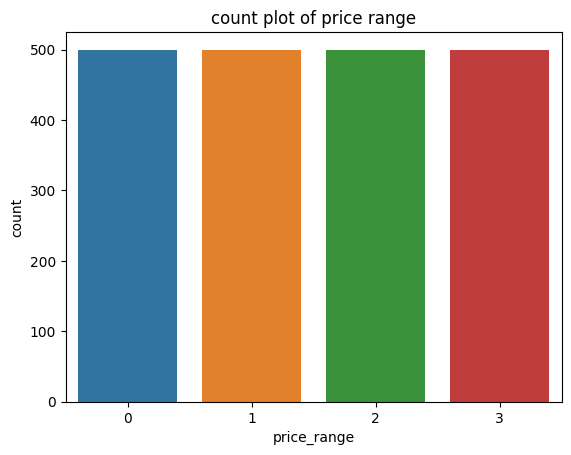

In [11]:
# lets first draw a count plot for our target category
print(df.groupby("price_range")["price_range"].count())
sns.countplot(x = "price_range",data = df)
plt.title("count plot of price range")
plt.show()

In [12]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [13]:
low_card=['blue','dual_sim','four_g','m_dep','n_cores','three_g','touch_screen','wifi']
medium_card=['clock_speed','fc','int_memory','pc','sc_h','sc_w','talk_time']
high_card=['battery_power','mobile_wt','px_height','px_width','ram']

                     mean        median           min           max
            battery_power battery_power battery_power battery_power
price_range                                                        
0                1116.902        1066.0           503          1994
1                1228.868        1206.0           501          1996
2                1228.320        1219.5           501          1998
3                1379.984        1449.5           503          1994


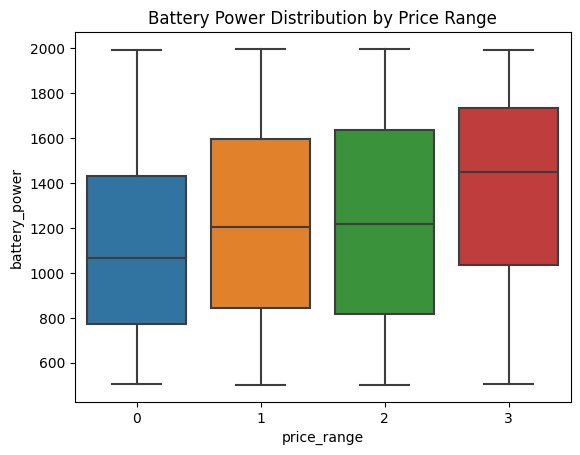

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


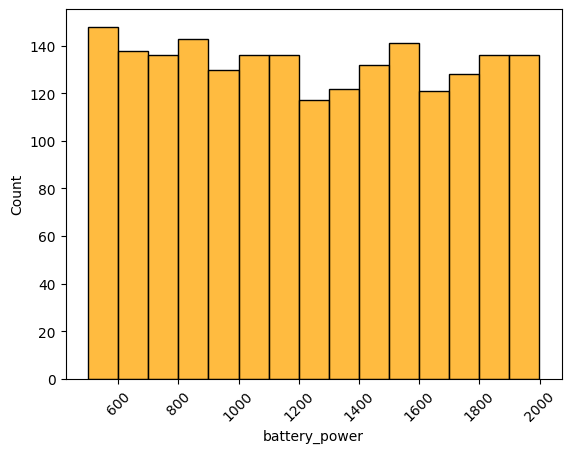

                 mean    median       min       max
            mobile_wt mobile_wt mobile_wt mobile_wt
price_range                                        
0             140.552     142.0        80       200
1             140.510     141.0        80       200
2             143.614     145.0        80       200
3             136.320     134.0        80       200


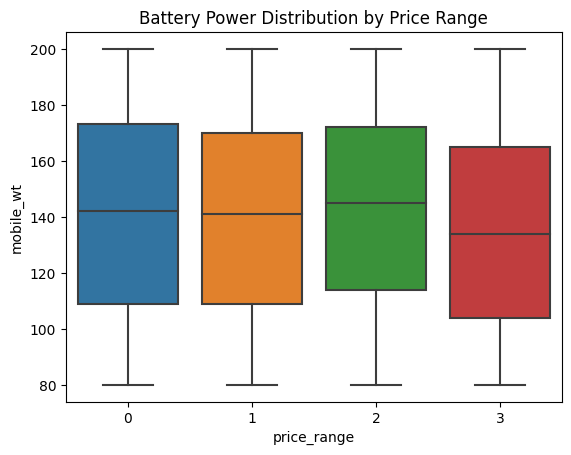

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


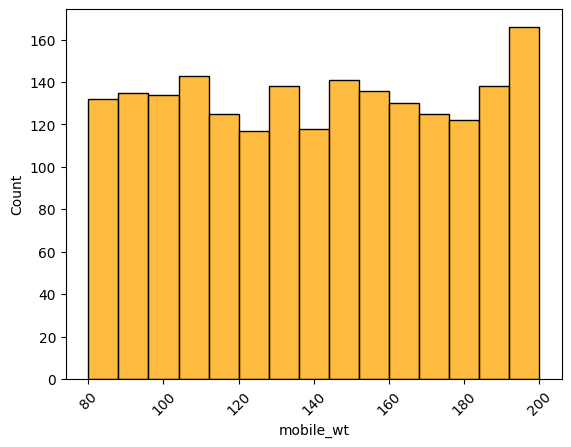

                 mean    median       min       max
            px_height px_height px_height px_height
price_range                                        
0             536.408     465.5         1      1878
1             666.892     606.0         0      1914
2             632.284     538.5        10      1960
3             744.848     674.0         0      1949


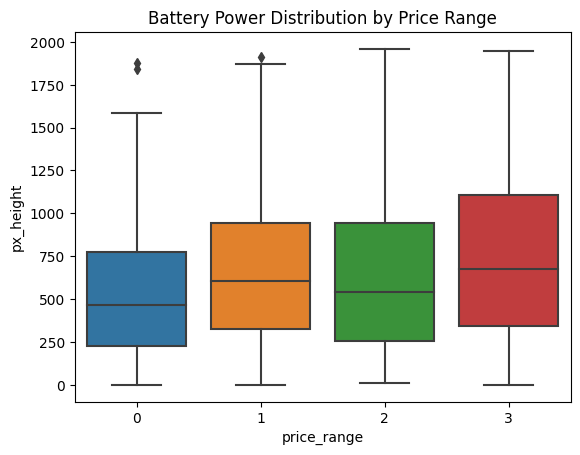

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


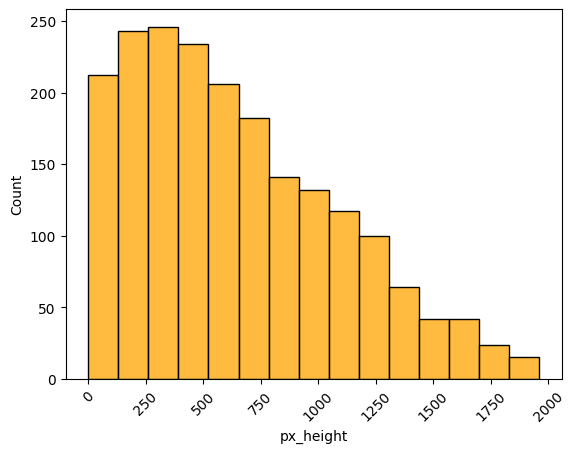

                 mean   median      min      max
             px_width px_width px_width px_width
price_range                                     
0            1150.270   1132.5      500     1989
1            1251.908   1223.0      500     1998
2            1234.046   1221.5      508     1997
3            1369.838   1415.5      501     1995


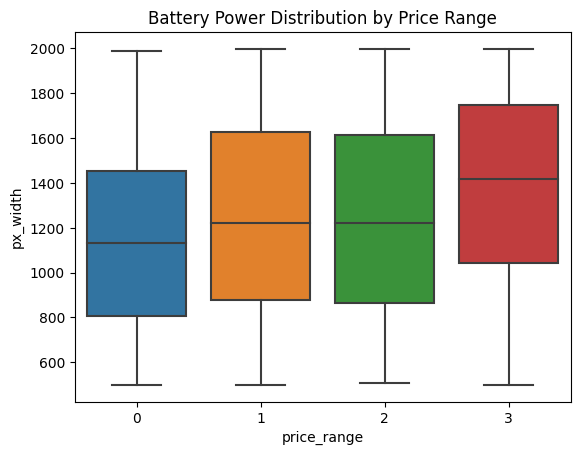

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


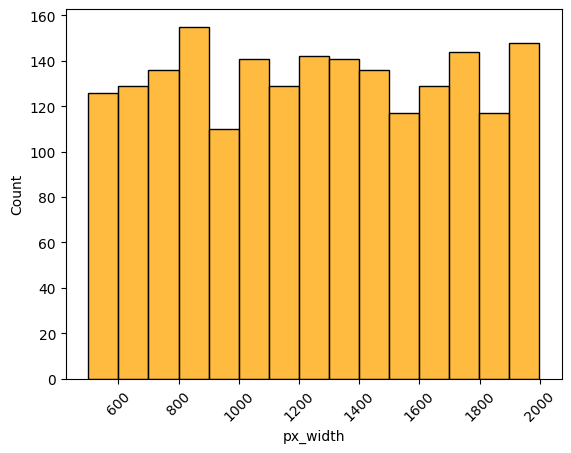

                 mean  median   min   max
                  ram     ram   ram   ram
price_range                              
0             785.314   719.5   256  1974
1            1679.490  1686.5   387  2811
2            2582.816  2577.0  1185  3916
3            3449.232  3509.5  2259  3998


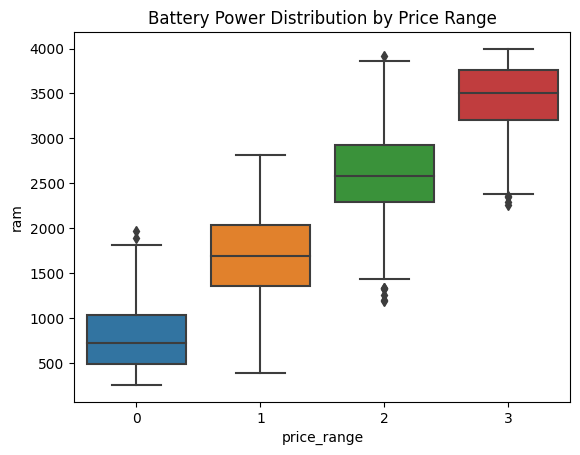

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


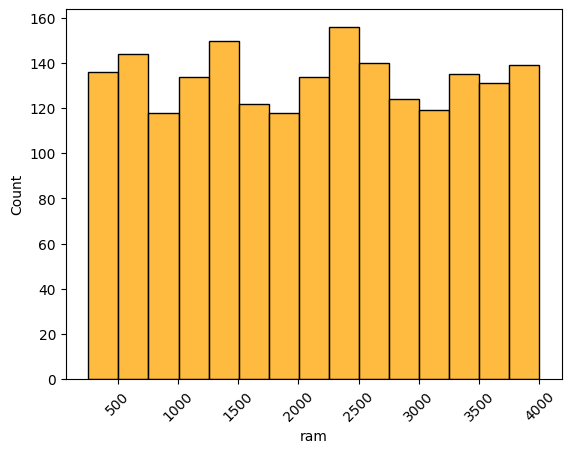

In [14]:
for i in high_card:
    # pivot table for battery distribution on the basis of price_range
    
    pivottable_batrry = df.pivot_table(
        values=i, 
        index="price_range", 
        aggfunc=["mean", "median", "min", "max"]
        )
    print(pivottable_batrry)
    # boxplot 
    sns.boxplot(x="price_range", y=i, data=df)
    plt.title("Battery Power Distribution by Price Range")
    plt.show()
            
            
    # histogram 
    sns.histplot(x=i,data =df,bins =15,color = "orange" )
    plt.xticks(rotation = 45)
    plt.show()
    

            

blue
0    1010
1     990
Name: count, dtype: int64
blue


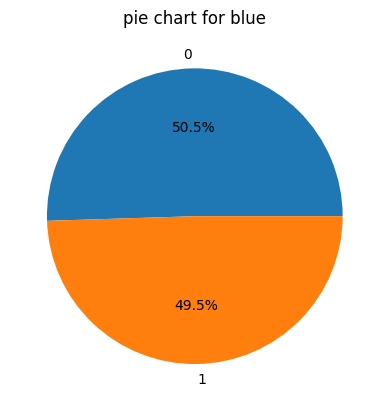

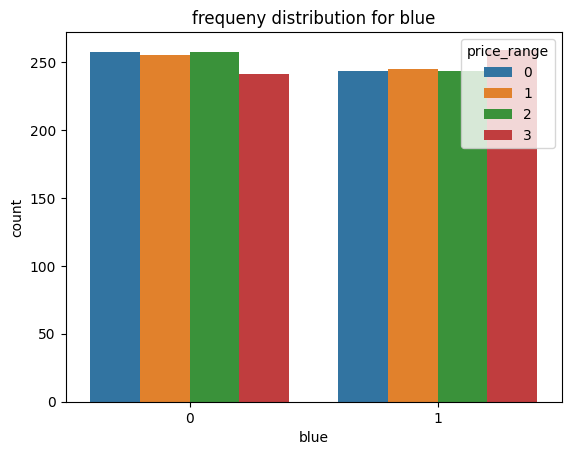

dual_sim


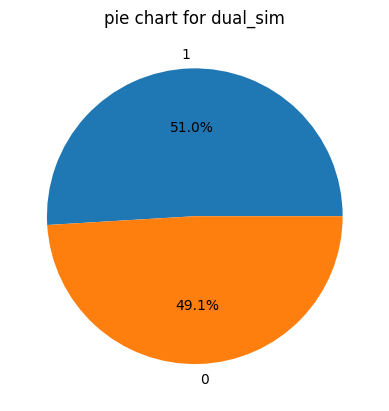

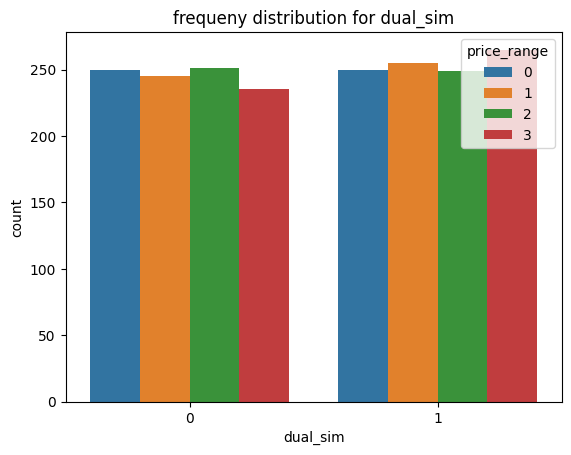

four_g


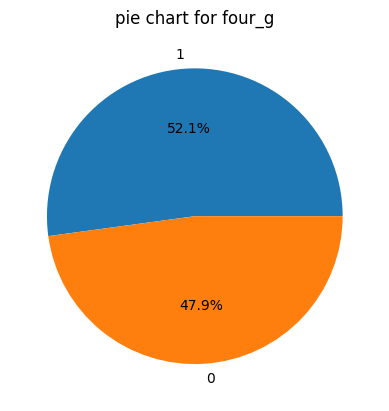

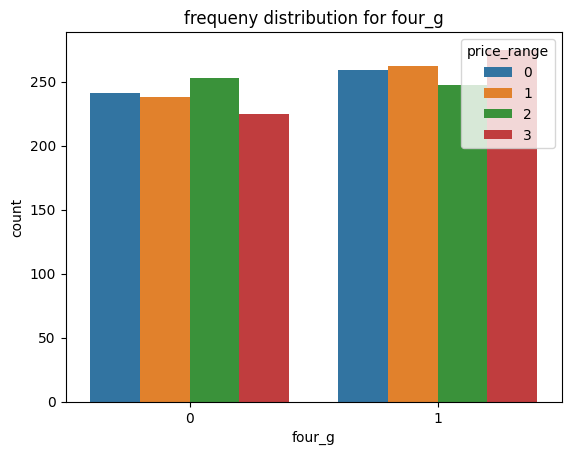

m_dep


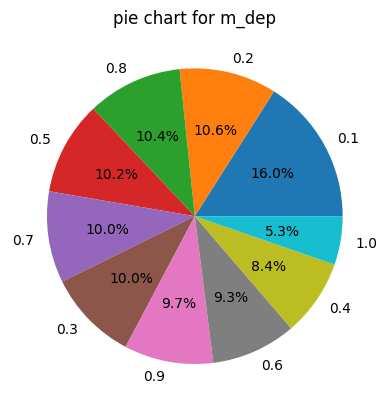

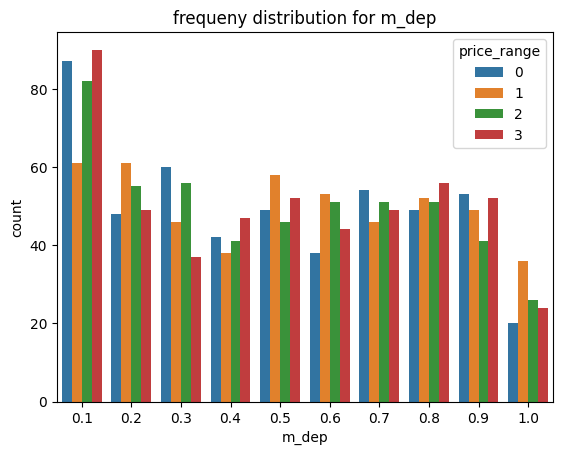

n_cores


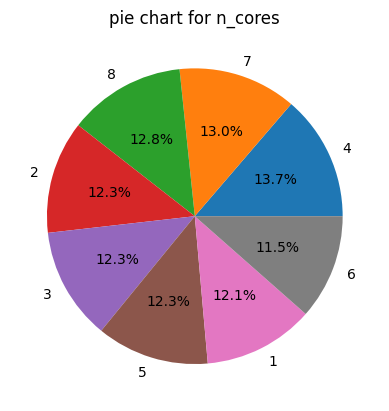

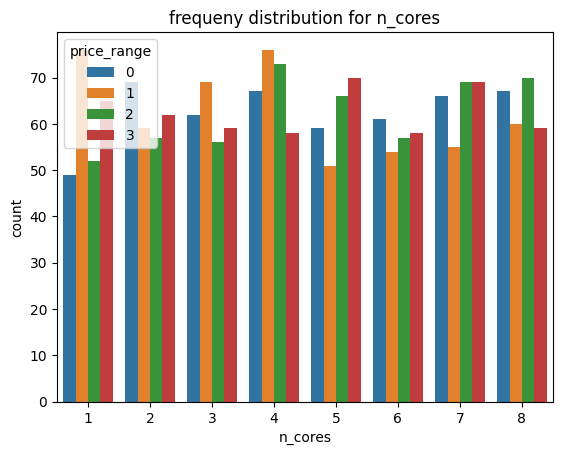

three_g


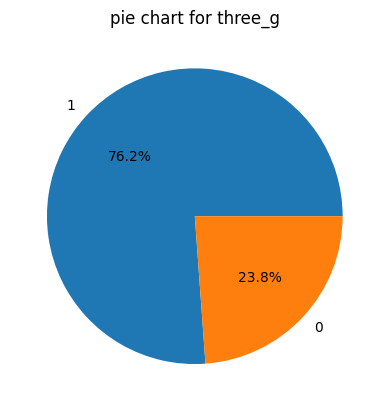

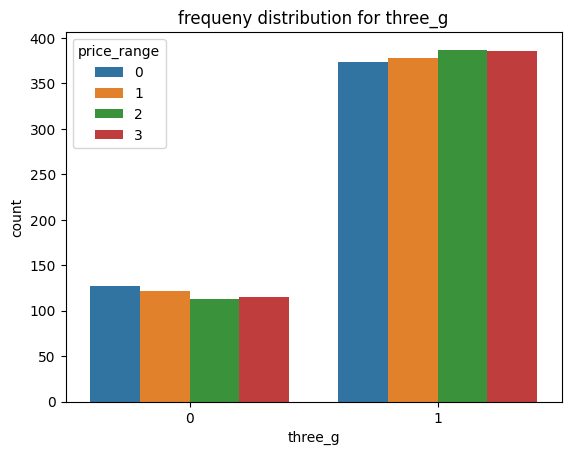

touch_screen


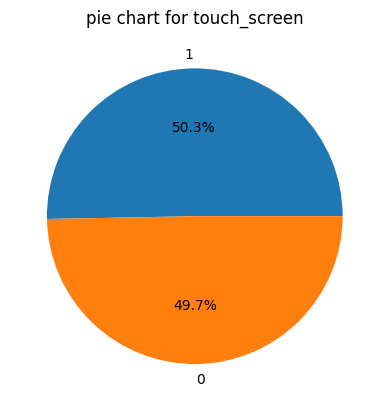

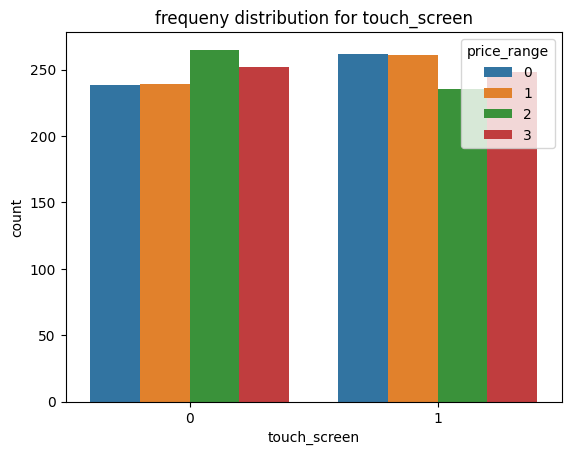

wifi


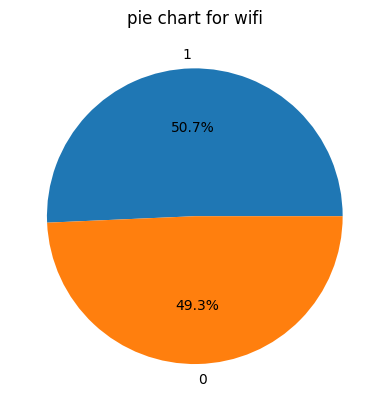

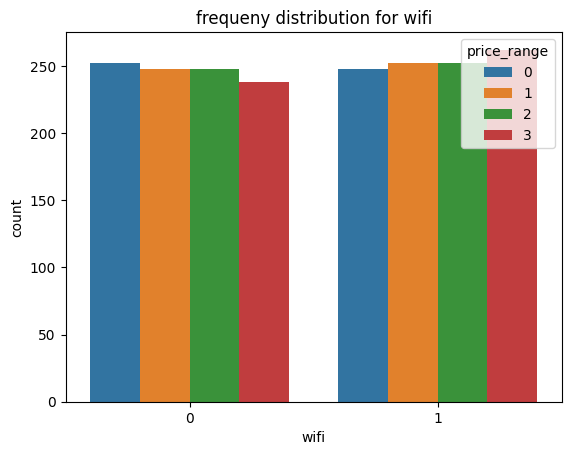

In [15]:
low_card=['blue','dual_sim','four_g','m_dep','n_cores','three_g','touch_screen','wifi']
print(df["blue"].value_counts())
for i in low_card:
    pvt_blue = df.pivot_table(
        values =i,
        index ="price_range",
        aggfunc = ["mean","max","median","min"]
    )
    print(i)
    
    # piechart 
    plt.pie(df[i].value_counts(),labels = df[i].value_counts().index,autopct = "%0.1f%%" )
    plt.title(f"pie chart for {i}")
    plt.show()
    
     
    # countplot
    sns.countplot(x =i,data =df,hue="price_range")
    plt.title(f"frequeny distribution for {i}")
    plt.show()

                   mean      median         min         max
            clock_speed clock_speed clock_speed clock_speed
price_range                                                
0                1.5502        1.55         0.5         3.0
1                1.4886        1.50         0.5         3.0
2                1.5298        1.50         0.5         3.0
3                1.5204        1.50         0.5         3.0


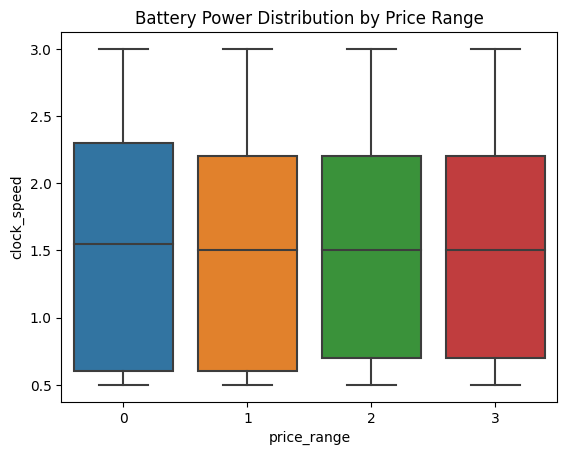

              mean median min max
                fc     fc  fc  fc
price_range                      
0            4.084    3.0   0  19
1            4.340    3.0   0  18
2            4.498    3.0   0  18
3            4.316    3.0   0  18


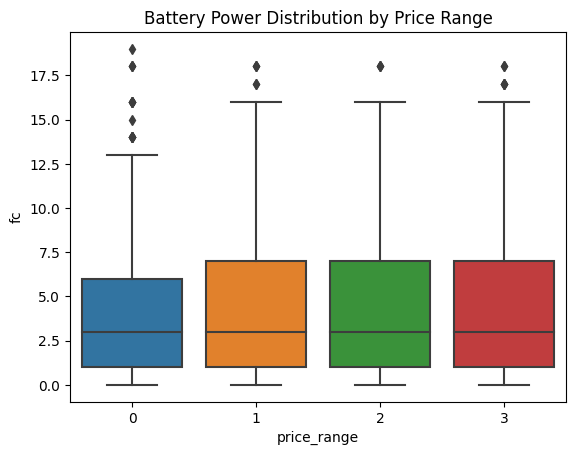

                  mean     median        min        max
            int_memory int_memory int_memory int_memory
price_range                                            
0               31.174       30.0          2         64
1               32.116       32.0          2         64
2               30.920       30.0          2         64
3               33.976       34.5          2         64


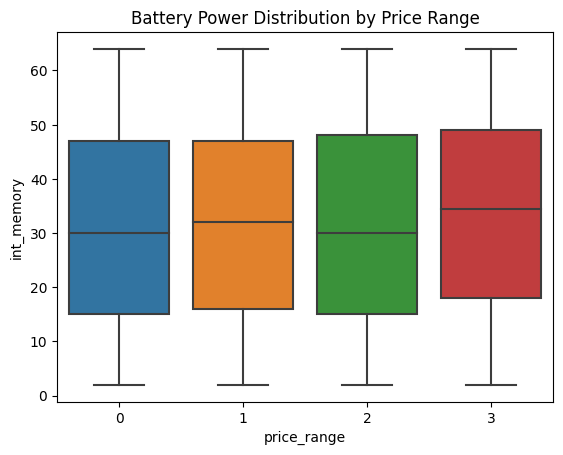

               mean median min max
                 pc     pc  pc  pc
price_range                       
0             9.574    9.5   0  20
1             9.924   10.0   0  20
2            10.018   10.0   0  20
3            10.150   10.0   0  20


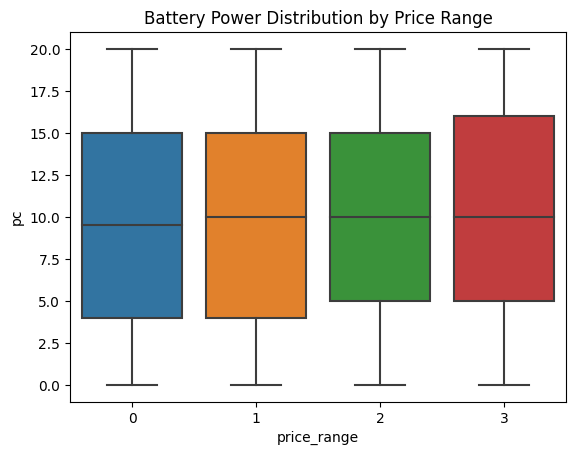

               mean median  min  max
               sc_h   sc_h sc_h sc_h
price_range                         
0            12.324   12.0    5   19
1            12.212   12.0    5   19
2            12.010   12.0    5   19
3            12.680   13.0    5   19


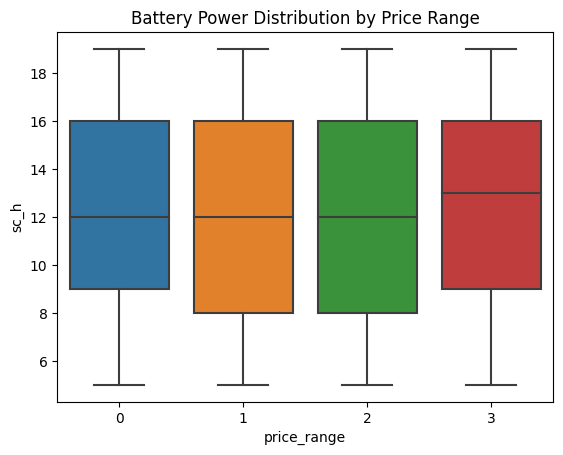

              mean median  min  max
              sc_w   sc_w sc_w sc_w
price_range                        
0            5.682    5.0    0   18
1            5.544    5.0    0   18
2            5.714    5.0    0   17
3            6.128    5.0    0   18


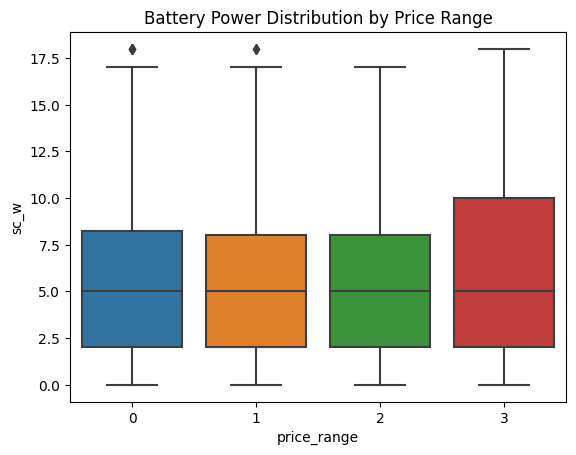

                 mean    median       min       max
            talk_time talk_time talk_time talk_time
price_range                                        
0              10.612      10.0         2        20
1              11.362      12.0         2        20
2              10.972      11.0         2        20
3              11.098      11.0         2        20


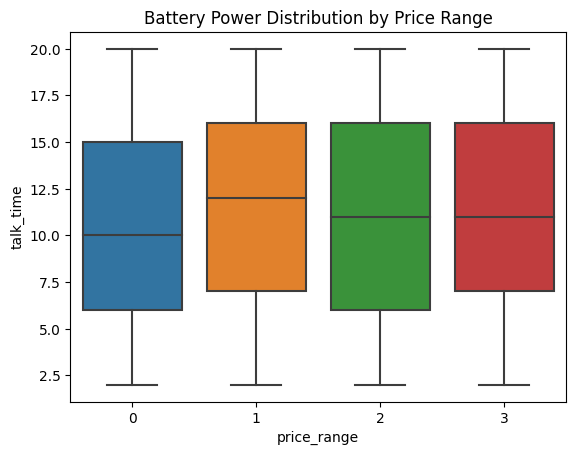

In [16]:
medium_card=['clock_speed','fc','int_memory','pc','sc_h','sc_w','talk_time']
for i in medium_card:
    pivottable_batrry = df.pivot_table(
        values=i, 
        index="price_range", 
        aggfunc=["mean", "median", "min", "max"]
        )
    print(pivottable_batrry)
    # boxplot 
    sns.boxplot(x="price_range", y=i, data=df)
    plt.title("Battery Power Distribution by Price Range")
    plt.show()

In [17]:
# from thses graph i observe battery_power has outli

## model training 

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns = "price_range"),df["price_range"],test_size = 0.2,random_state = 1)

In [19]:
xtrain.shape

(1600, 20)

In [20]:
#import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
tre = DecisionTreeClassifier()
voting =VotingClassifier(estimators=[("logr",LogisticRegression(max_iter = 100000,solver="saga")),("dt",DecisionTreeClassifier()),("ad",AdaBoostClassifier())])
logr = LogisticRegression(max_iter = 100000,solver='saga')
forest = RandomForestClassifier()
bag=BaggingClassifier()
adboost = AdaBoostClassifier()


In [21]:
tre.fit(xtrain,ytrain)


DecisionTreeClassifier()

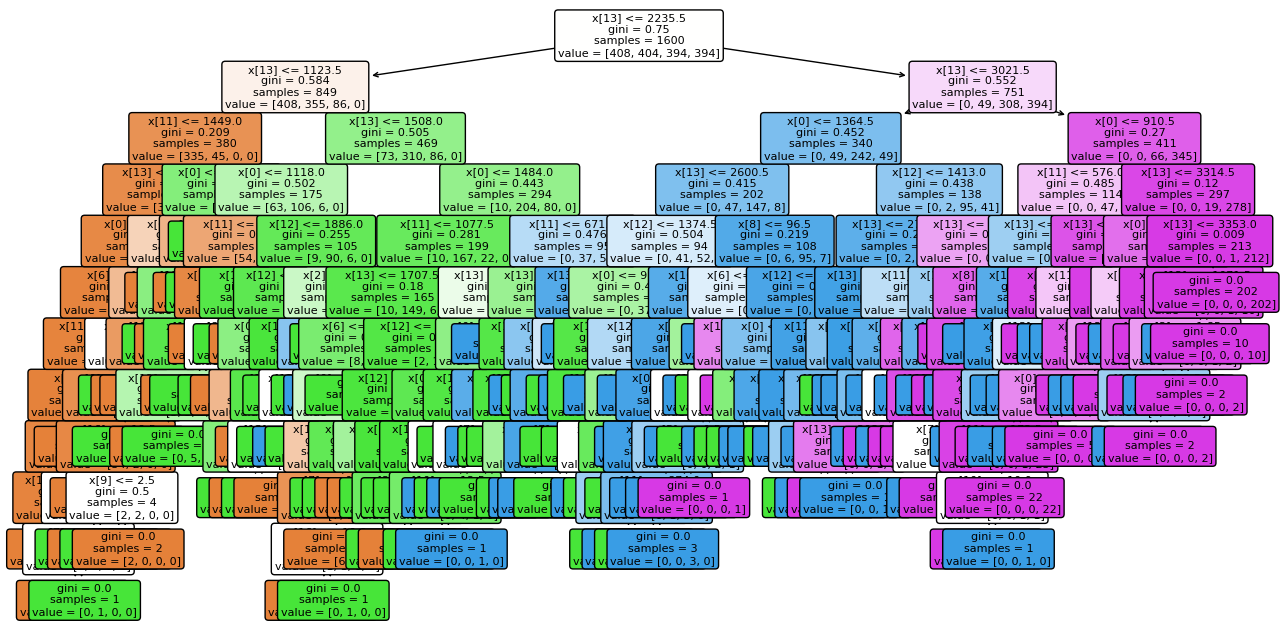

In [22]:

from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
plot_tree(tre,filled=True,rounded=True, fontsize=8)
plt.show()

In [23]:
voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('logr',
                              LogisticRegression(max_iter=100000,
                                                 solver='saga')),
                             ('dt', DecisionTreeClassifier()),
                             ('ad', AdaBoostClassifier())])

In [24]:
logr.fit(xtrain,ytrain)

LogisticRegression(max_iter=100000, solver='saga')

In [25]:
forest.fit(xtrain,ytrain)


RandomForestClassifier()

In [26]:
bag.fit(xtrain,ytrain)

BaggingClassifier()

In [27]:
adboost.fit(xtrain,ytrain)

AdaBoostClassifier()

In [28]:
# lets now count the accuracy score for each model
from sklearn.metrics import accuracy_score
print(f"accuracy score for decison tree {accuracy_score(ytest,tre.predict(xtest))}")
print(f"accuracy score for random forest {accuracy_score(ytest,forest.predict(xtest))}")
print(f"accuracy score for voting {accuracy_score(ytest,voting.predict(xtest))}")
print(f"accuracy score for adaboost {accuracy_score(ytest,adboost.predict(xtest))}")
print(f"accuracy score for bagging {accuracy_score(ytest,bag.predict(xtest))}")

accuracy score for decison tree 0.84
accuracy score for random forest 0.86
accuracy score for voting 0.8375
accuracy score for adaboost 0.7225
accuracy score for bagging 0.86


## hyperparameter tunning

In [29]:
# now time for hyperparameter tunning
# for random forest
from sklearn.model_selection import GridSearchCV
paramgrid = {
    "n_estimators" : [100,200,500,1000],
    "max_depth" :[2,5,10],
    "oob_score":[True,False]
    
}
grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid =paramgrid,cv=3,n_jobs =-1)
grid.fit(xtrain,ytrain)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000],
                         'oob_score': [True, False]})

In [30]:
# best parameters aree
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'n_estimators': 1000, 'oob_score': False}
0.8793651462875908


In [31]:
forest_tun = RandomForestClassifier(max_depth=10,n_estimators=500,oob_score=False)
forest_tun.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, n_estimators=500)

In [32]:
# now time for hyperparameter tunning
# for adaboost
paramgrid = {
    "n_estimators" : [100,200,500,1000],
    "learning_rate":[1.0,0.1,0.01]
    
    
}
grid_adaboost = GridSearchCV(estimator = AdaBoostClassifier(random_state =1),param_grid = paramgrid,cv = 3,n_jobs=-1)
grid_adaboost.fit(xtrain,ytrain)




GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.01],
                         'n_estimators': [100, 200, 500, 1000]})

In [33]:
# traing of tunned model
print(grid_adaboost.best_params_)
print(grid_adaboost.best_score_)

{'learning_rate': 1.0, 'n_estimators': 500}
0.7500638273452743


In [34]:
adaboost_tun = AdaBoostClassifier(learning_rate = 1.0,n_estimators = 500)
adaboost_tun.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=500)

In [35]:
# now time for hyperparameter tunning
# for boosting
from sklearn.model_selection import GridSearchCV
paramgrid = {
    "n_estimators" : [100,200,500,1000],
    "bootstrap":[True,False],
    
    
}
grid_bag = GridSearchCV(estimator = BaggingClassifier(random_state=1),param_grid =paramgrid,cv=3,n_jobs=-1)
grid_bag.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [100, 200, 500, 1000]})

In [36]:
# best parameters
print(grid_bag.best_params_)
print(grid_bag.best_score_)

{'bootstrap': True, 'n_estimators': 100}
0.8918823328250568


In [37]:
# now train our model again
bag_tun = BaggingClassifier(bootstrap = True,n_estimators=100)
bag_tun.fit(xtrain,ytrain)

BaggingClassifier(n_estimators=100)

In [38]:
# now time for hyperparameter tunning
# for boosting
from sklearn.model_selection import GridSearchCV
paramgrid = {
    "criterion":["gini","entropy"] , 
    "max_depth":[10,12]
    
    
}
grid_tre = GridSearchCV(estimator = DecisionTreeClassifier(random_state=1),param_grid =paramgrid,cv=3,n_jobs=-1)
grid_tre.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12]})

In [39]:
# best parameters
print(grid_tre.best_params_)
print(grid_tre.best_score_)

{'criterion': 'entropy', 'max_depth': 10}
0.8268885281765522


In [40]:
# fitting with best parameter
tre_tun = DecisionTreeClassifier(criterion='entropy',max_depth=10)
tre_tun.fit(xtrain,ytrain)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

## SCORE COMPARISION 

In [41]:
# lets compare accuracy score for every model
print(f"accuracy score for decison tree {accuracy_score(ytest,tre.predict(xtest))}")
print(f"accuracy score for decison tree after tunning {accuracy_score(ytest,tre_tun.predict(xtest))}")

print("\n\n")

print(f"accuracy score for random forest {accuracy_score(ytest,forest.predict(xtest))}")
print(f"accuracy score for random forest after tunning {accuracy_score(ytest,forest_tun.predict(xtest))}")

print("\n\n")

print(f"accuracy score for voting {accuracy_score(ytest,voting.predict(xtest))}")

print("\n\n")

print(f"accuracy score for adaboost {accuracy_score(ytest,adboost.predict(xtest))}")
print(f"accuracy score for adaboost after tunning  {accuracy_score(ytest,adaboost_tun.predict(xtest))}")

print("\n\n")

print(f"accuracy score for bagging after tunning {accuracy_score(ytest,bag_tun.predict(xtest))}")
print(f"accuracy score for bagging {accuracy_score(ytest,bag.predict(xtest))}")

accuracy score for decison tree 0.84
accuracy score for decison tree after tunning 0.85



accuracy score for random forest 0.86
accuracy score for random forest after tunning 0.865



accuracy score for voting 0.8375



accuracy score for adaboost 0.7225
accuracy score for adaboost after tunning  0.78



accuracy score for bagging after tunning 0.875
accuracy score for bagging 0.86


#conclusion

## CONCLUSION
Best performing model:
Tuned Random Forest (0.8675)

Strong alternative: Bagging (0.89 after tuning is slightly higher, probably due to different tuning)

Less effective: AdaBoost and Voting Classifier — tuning helps, but accuracy is lower.

Decision Tree: Simple model, hyperparameter tuning has minimal effect — prone to overfitting.

Takeaway:

Ensembles (Random Forest, Bagging) outperform single trees.

Tuning hyperparameters improves performance for ensemble methods more than single trees.

Voting ensemble may underperform if individual base models are weak or similar.